## Python notebook template block Adventure Work 
#### Your Name:Lin Zien
#### Your University/College/ Major Zhejiang University of Technology
#### Your Email: rock13678@163.com

As of now, you created a new notebook for your study with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about AD should be in this one template. Go back to the code you wrote, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. 

This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. 

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️


### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
import pandas as pd
import numpy as np

### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:
# data = pd.read_csv(".../path/to/data.csv")
# data = pd.read_excel(file_path)
data = pd.read_excel('BikeBuyers2.xlsx')

## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

In [3]:
# add your code here for data cleaning of the adventure data set
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

print(len(data))#样本数
print(len(data.columns))#维度

# 提取出生日期
data['BirthYear'] = pd.to_datetime(data['BirthDate']).dt.year

# 创建一个字典，将性别映射到数值
gender_to_number = {"M": 1, "F": 0}
# 使用列表推导式将性别转换为数值
data["Gender number"] = data["Gender"].map(gender_to_number)

# 创建一个字典，将MaritalStatus映射到数值
maritalstatus_to_number = {"M": 1, "S": 0}
# 使用列表推导式将MaritalStatus转换为数值
data["MaritalStatus number"] = data["MaritalStatus"].map(maritalstatus_to_number)

# 创建一个字典，将学历映射到数值
education_to_number = {"Bachelors": 4, "Graduate D": 5, "High Schoo": 2, "Partial Co": 3, "Partial Hi": 1}
# 使用map函数将学历列转换为数值，并将结果存储在新的列"education_number"中
data["education_number"] = data["Education"].map(education_to_number)

# 计算年收入列的中位数
median_income = data["YearlyIncome"].median()
# 使用中位数填充缺失值
data["YearlyIncome"].fillna(median_income, inplace=True)

# 计算总子女列的均值
mean_totalchildren = data["TotalChildren"].mean()
# 使用均值填充缺失值
data["TotalChildren"].fillna(int(mean_totalchildren), inplace=True)

# 计算NumberCarsOwned列的均值
mean_numbercarsowned = data["NumberCarsOwned"].mean()
# 使用均值填充缺失值
data["NumberCarsOwned"].fillna(int(mean_numbercarsowned), inplace=True)

# 使用LabelEncoder处理职业数据
le = LabelEncoder()
data["Occupation Number"] = le.fit_transform(data["Occupation"])
# 使用OneHotEncoder处理职业数据
X = data["Occupation"].values.reshape(-1,1) 
enc = OneHotEncoder(categories='auto').fit(X)
occupation_number = enc.transform(X).toarray()

# 使用LabelEncoder处理州代码数据
le = LabelEncoder()
data["StateProvinceCode Number"] = le.fit_transform(data["StateProvinceCode"])
# 使用OneHotEncoder处理州代码数据
X = data["StateProvinceCode"].values.reshape(-1,1) 
enc = OneHotEncoder(categories='auto').fit(X)
stateprovincecode = enc.transform(X).toarray()

# 保存处理后的数据到新的excel文件
data.to_excel("BikeBuyers2.xlsx", index=False)

2059
31


In [4]:
#data["Occupation Number"] = occupation_number
#data["StateProvinceCode Number"] = stateprovincecode

### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. 

#### Gender number  性别
#### MaritalStatus number  婚姻状况
#### education_number  学历
#### YearlyIncome  年收入
#### TotalChildren  总子女
#### NumberCarsOwned  车辆数
#### BirthYear  出生日期
#### NumberChildrenAtHome  家中子女
#### occupation_number  职业
#### HouseOwnerFlag  住房拥有数
#### stateprovincecode  州代码
#### Amount  购买总数
#### Category 用户类别

In [3]:
# Add your exploratory data analysis of the NAC data here. You can add Mark Down blocks (or output f-strings) to provide explanations to your code, alongside comments made in your code.
#图表
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizations

Include all the visualizations you made in this section. Use the blocks below to enter the code for graphs you created with matplotlib (or seaborn, bokeh, or another visualization package). 

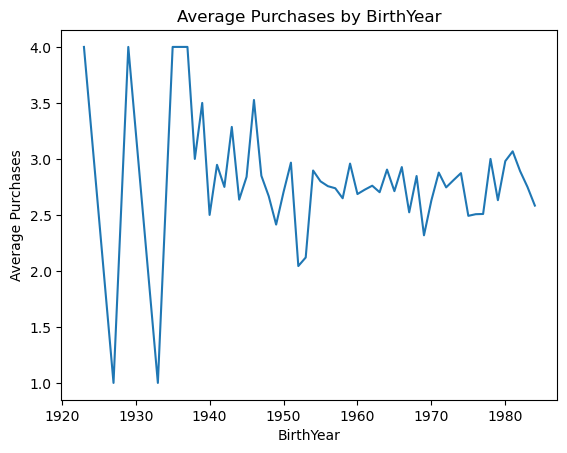

In [6]:
# Add visualizations here that you made to present insights in the adventure data. Create a new codeblock for every graph. Add markdown blocks to describe your graphs where necessary.

# 根据年龄分组并计算平均购买数量
grouped = data.groupby('BirthYear')['Amount'].mean()

# 使用matplotlib绘制折线图
plt.plot(grouped.index, grouped.values)
plt.xlabel("BirthYear")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by BirthYear")
plt.show()

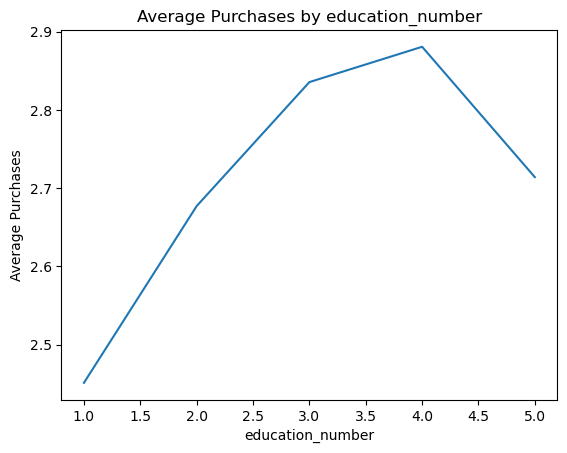

In [7]:
# 根据学历分组并计算平均购买数量
grouped = data.groupby('education_number')['Amount'].mean()

# 使用matplotlib绘制折线图
plt.plot(grouped.index, grouped.values)
plt.xlabel("education_number")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by education_number")
plt.show()

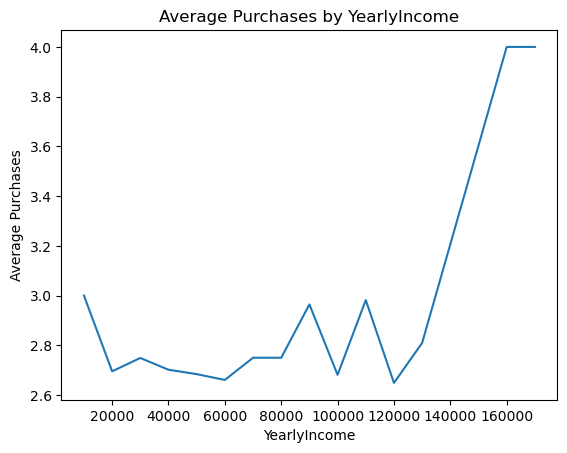

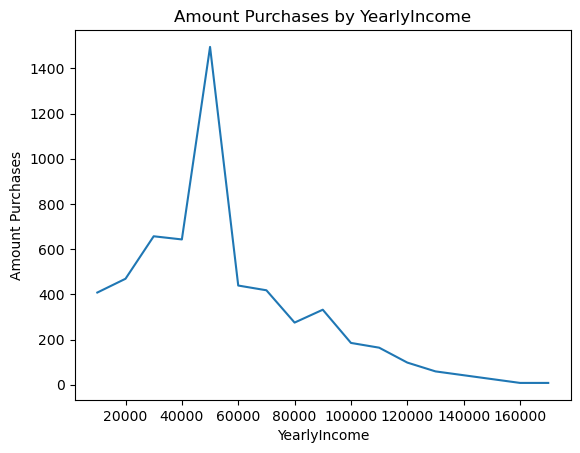

In [10]:
# 根据年收入分组并计算平均购买数量
grouped = data.groupby('YearlyIncome')['Amount'].mean()

# 使用matplotlib绘制折线图
plt.plot(grouped.index, grouped.values)
plt.xlabel("YearlyIncome")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by YearlyIncome")
plt.show()
# 根据年收入分组并计算总购买数量
grouped = data.groupby('YearlyIncome')['Amount'].sum()

# 使用matplotlib绘制折线图
plt.plot(grouped.index, grouped.values)
plt.xlabel("YearlyIncome")
plt.ylabel("Amount Purchases")
plt.title("Amount Purchases by YearlyIncome")
plt.show()

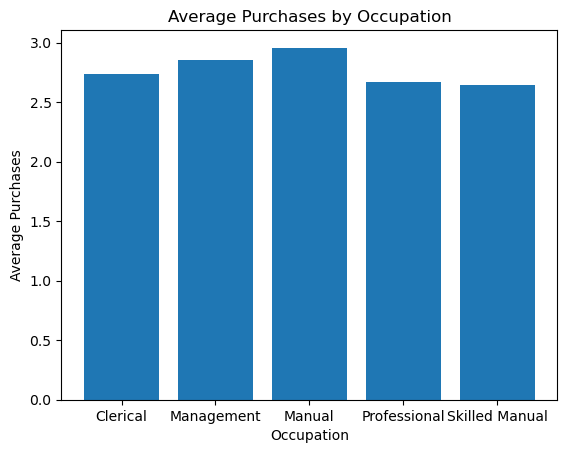

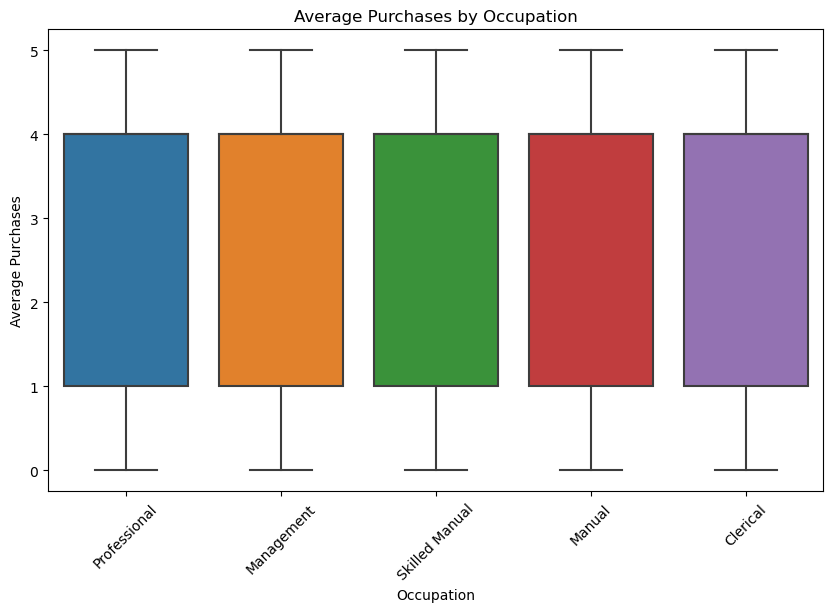

In [9]:
# 根据职业分组并计算平均购买数量
grouped = data.groupby('Occupation')['Amount'].mean()

# 使用matplotlib绘制柱状图
plt.bar(grouped.index, grouped.values)
plt.xlabel("Occupation")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by Occupation")
plt.show()
# 绘制箱型图
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Occupation', y='Amount')
plt.xlabel("Occupation")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by Occupation")
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.show()

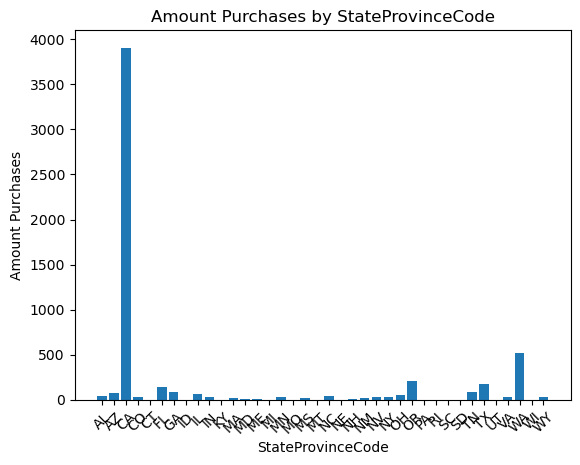

In [14]:
# 根据州代码分组并计算购买数量
grouped = data.groupby('StateProvinceCode')['Amount'].sum()

# 使用matplotlib绘制柱状图
plt.bar(grouped.index, grouped.values)
plt.xlabel("StateProvinceCode")
plt.ylabel("Amount Purchases")
plt.title("Amount Purchases by StateProvinceCode")
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.show()

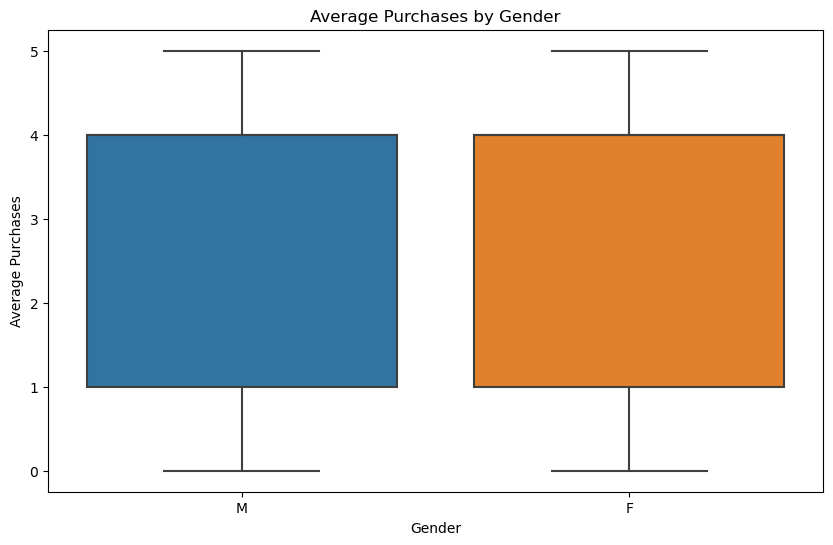

In [11]:
# 根据性别分组并计算平均购买数量
#grouped = data.groupby('Gender')['Amount'].mean()

# 使用matplotlib绘制柱状图
#plt.bar(grouped.index, grouped.values)
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='Gender', y='Amount')
plt.xlabel("Gender")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by Gender")
plt.show()

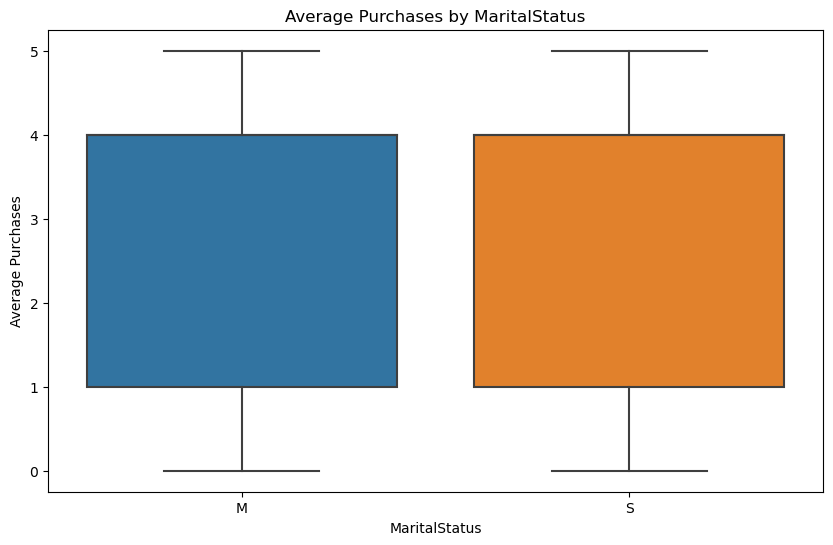

In [12]:
# 根据婚姻状况分组并计算平均购买数量
#grouped = data.groupby('MaritalStatus')['Amount'].mean()

# 使用matplotlib绘制柱状图
#plt.bar(grouped.index, grouped.values)
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='MaritalStatus', y='Amount')
plt.xlabel("MaritalStatus")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by MaritalStatus")
plt.show()

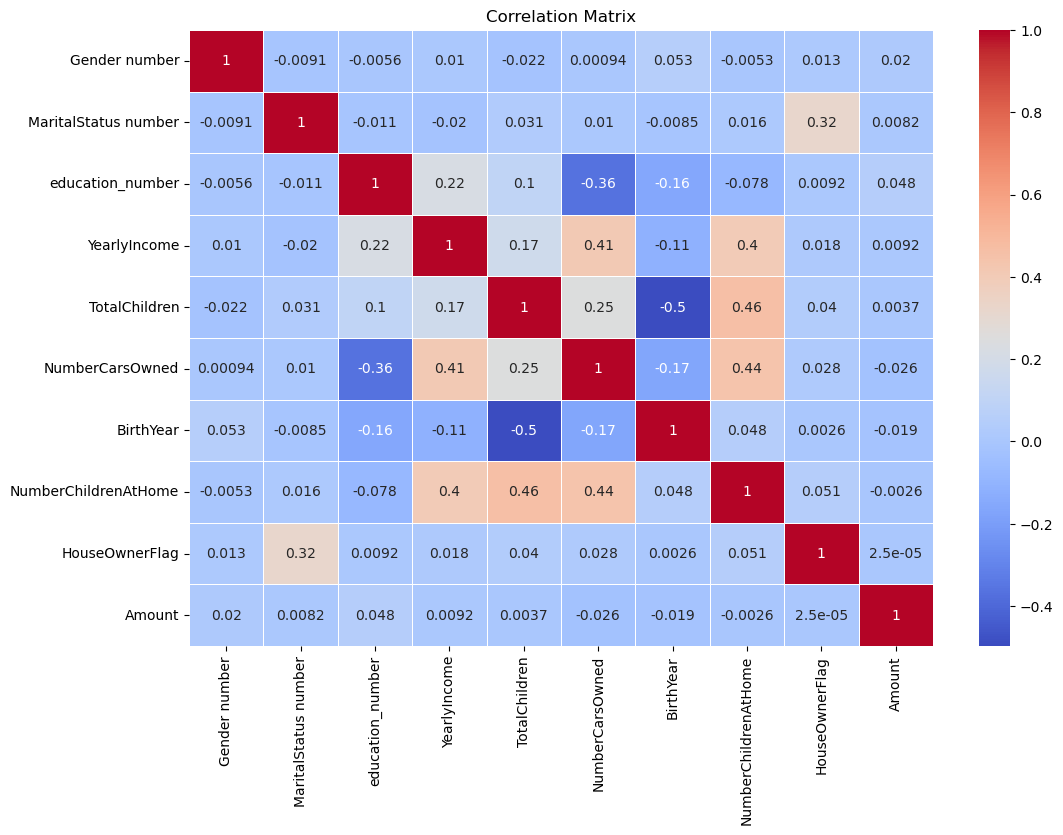

In [18]:

# Plot the heatmap
df = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren','NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag','Amount']]

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Correlation Analysis and Feature Selection

In [13]:
# Enter your code here for your correlation analysis


In [64]:
# Enter your code here for your feature selection. Add markdown comments for why you chose these features below.


✍️ I chose the features above because ...

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [6]:
# Enter your code here for a simple machine learning modelling pipeline 
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
#features = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren','NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag','Amount','Occupation Number','StateProvinceCode Number']],
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)
#kmeans = KMeans(n_clusters=9, random_state=42)
#clustered_data = kmeans.fit_predict(features_scaled)
#print(clustered_data)
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',
                 'Amount']]
# 数据标准化
sacle_matrix = X # 获得要转换的矩阵
model_scaler = MinMaxScaler() # 建立MinMaxScaler模型对象
data_scaled = model_scaler.fit_transform(sacle_matrix) # MinMaxScaler标准化处理

features_scaled = np.hstack((stateprovincecode,occupation_number,sacle_matrix))
target = data['Category']
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(pd.DataFrame(features))


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

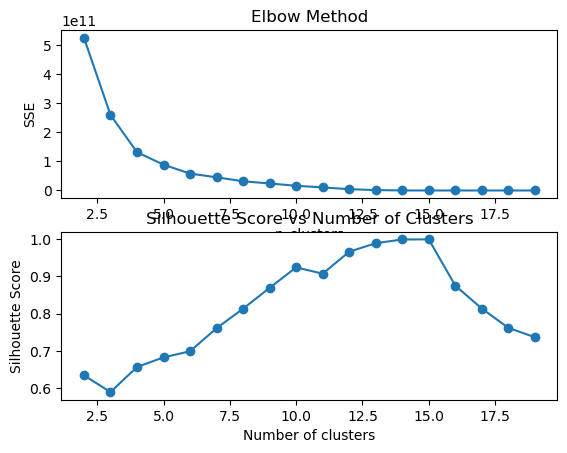

In [8]:
# 设置聚类数量范围
n_clusters = np.arange(2, 20)
# 存储每个聚类数量的成本函数值和轮廓系数
sse = []
score_list = []
# 对每个聚类数量运行K-means算法并计算成本函数值,轮廓系数
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)
    silhouette_tmp = silhouette_score(features_scaled, kmeans.labels_)
    score_list.append(silhouette_tmp) # 将每次K及其得分追加到列表
# 绘制Elbow Method图和轮廓系数图
plt.subplot(211)
plt.plot(n_clusters, sse, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(212)
plt.plot(n_clusters, score_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient Method')

plt.show()

### kmeans聚类

In [11]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(features_scaled)
print(kmeans.labels_)
#计算 KMeans 聚类结果的轮廓系数
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(silhouette_avg)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 0 4 ... 0 2 8]
0.8689505435306859


[9.99999819e-01 1.66767042e-07]


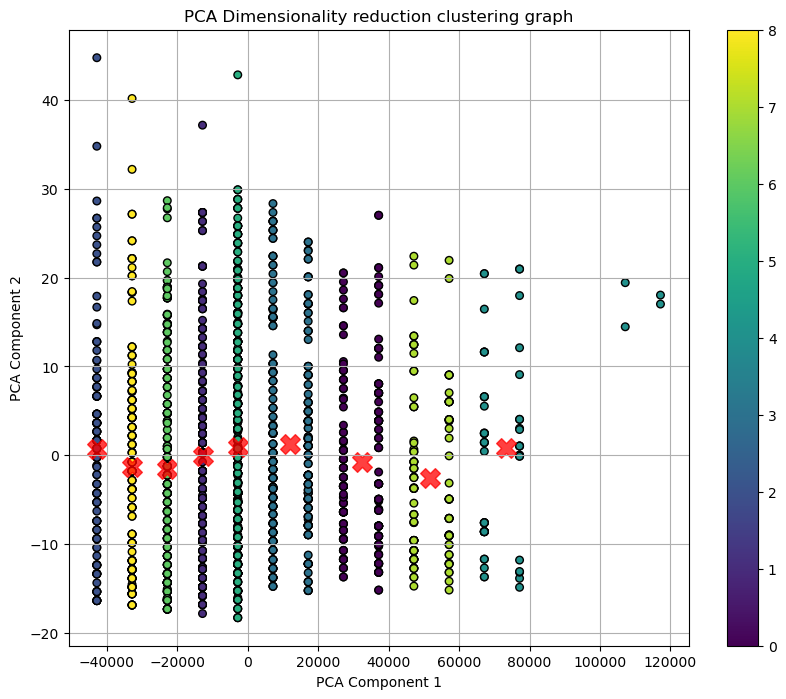

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
print(pca.explained_variance_ratio_)#可解释方差贡献率

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=30)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('PCA Dimensionality reduction clustering graph')
plt.colorbar(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

[0.51240931 0.26273854]
0.7008256435162701


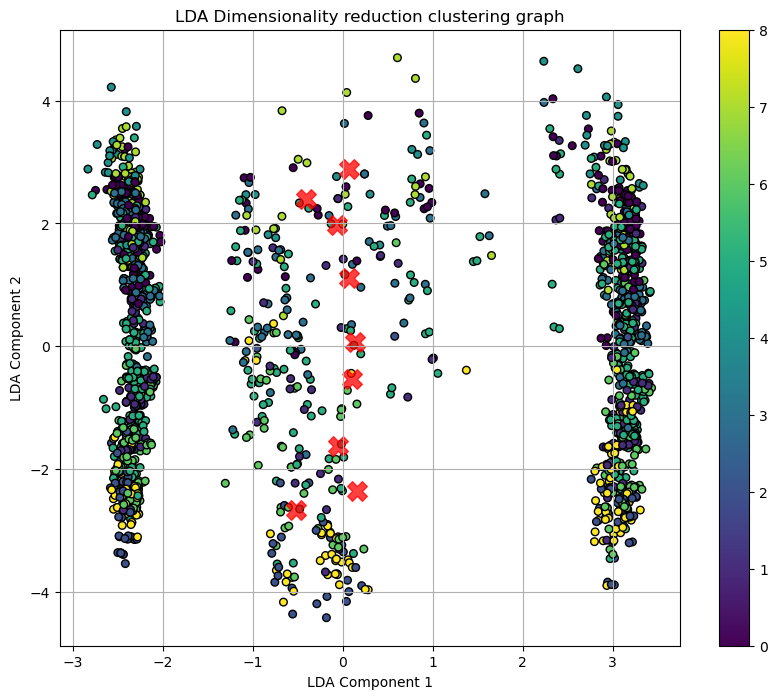

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(features_scaled,target)
features_lda = lda.transform(features_scaled)
target_pred = lda.predict(features_scaled)
print(lda.explained_variance_ratio_)
print(accuracy_score(target, target_pred))
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_lda[:, 0], features_lda[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=30)
centers = lda.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('LDA Dimensionality reduction clustering graph')
plt.colorbar(scatter)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()

## 线性回归

In [5]:
from sklearn.linear_model import LinearRegression
# 创建数据
X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',]]
y = data['Amount']
# 创建多元线性回归模型实例
model = LinearRegression()
# 拟合模型
model.fit(X, y)

# 打印模型参数
print("截距项：", model.intercept_)
print("回归系数：", model.coef_)

# 预测新数据
#new_data = np.array([    ])
#prediction = model.predict(new_data)
#print("预测结果：", prediction)

from sklearn.metrics import mean_squared_error
# 预测结果
y_pred = model.predict(X)

# 计算均方误差
mse = mean_squared_error(y, y_pred)
print("均方误差：", mse)

截距项： 9.880465478350693
回归系数： [ 6.76653687e-02  3.16902668e-02  4.92780374e-02  8.21861242e-08
 -1.62582527e-02 -2.81010520e-02 -3.70450045e-03  1.84830474e-02
 -1.11599020e-02]
均方误差： 2.4163583370800175


## KNN K近邻算法

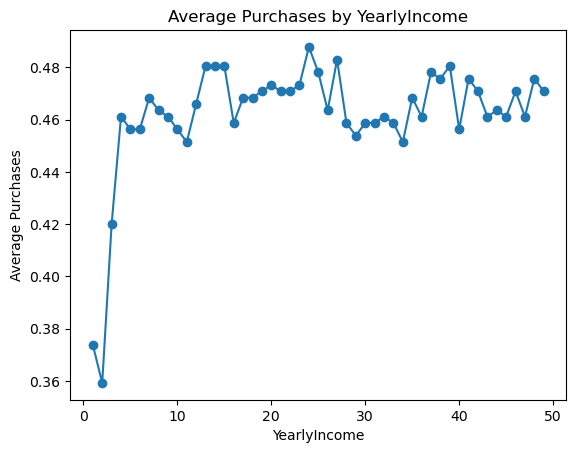

最佳k值： 24 准确率： 0.4878640776699029


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 创建数据
X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',]]
# 自变量矩阵，每一行代表一个样本，每一列代表一个特征
y = data['Amount']# 因变量向量，每个元素对应一个样本的类别标签 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neighbors = np.arange(1, 50)
accuracy = []
for k in n_neighbors:
  # 创建k近邻分类器实例
    knn = KNeighborsClassifier(n_neighbors=k)

  # 拟合模型
    knn.fit(X_train, y_train)

  # 预测结果
    y_pred = knn.predict(X_test)

  # 计算准确率
    accuracy.append(accuracy_score(y_test, y_pred))

# 使用matplotlib绘制折线图
plt.plot(n_neighbors, accuracy, marker='o')
plt.xlabel("YearlyIncome")
plt.ylabel("Average Purchases")
plt.title("Average Purchases by YearlyIncome")
plt.show()

print("最佳k值：",n_neighbors[np.argmax(accuracy)],"准确率：", np.amax(accuracy))


## 决策树

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 创建数据
X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',]]
# 自变量矩阵，每一行代表一个样本，每一列代表一个特征
y = data['Amount']# 因变量向量，每个元素对应一个样本的类别标签 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树分类器实例
clf = DecisionTreeClassifier()

# 拟合模型
clf.fit(X_train, y_train)

# 预测结果
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

准确率： 0.39805825242718446


## 支持向量机

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 创建数据
X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',]]
# 自变量矩阵，每一行代表一个样本，每一列代表一个特征
y = data['Amount']# 因变量向量，每个元素对应一个样本的类别标签 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建SVM分类器实例
clf = SVC()

# 拟合模型
clf.fit(X_train, y_train)

# 预测结果
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)


准确率： 0.5097087378640777


## 神经网络

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 创建数据
X = data[['Gender number', 'MaritalStatus number','education_number','YearlyIncome','TotalChildren',
                 'NumberCarsOwned','BirthYear','NumberChildrenAtHome','HouseOwnerFlag',]]
# 自变量矩阵，每一行代表一个样本，每一列代表一个特征
y = data['Amount']# 因变量向量，每个元素对应一个样本的类别标签 

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建神经网络模型
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=9))
model.add(Dense(units=1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 拟合模型
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 预测结果
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print("均方误差：", mse)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)


Epoch 1/100


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.3686 - loss: -29188.5137 
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.3452 - loss: -71994.5859
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3456 - loss: -138695.4375
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3720 - loss: -225041.2969
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3840 - loss: -344802.6562
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3436 - loss: -515253.1562
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.3651 - loss: -679023.1250
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.3590 - loss: -892486.3750
Epoch 9/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.3726 - loss: -1158885.3750
Epoch 10/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.3651 - loss: -1469390.6250
Epoch 11/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.3641 - loss:

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3423 - loss: -58816452.0000
Epoch 65/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3470 - loss: -59272084.0000
Epoch 66/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3580 - loss: -57530368.0000
Epoch 67/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3508 - loss: -60736024.0000
Epoch 68/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3429 - loss: -64532200.0000
Epoch 69/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.3586 - loss: -64169016.0000
Epoch 70/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3529 - loss: -67336368.0000
Epoch 71/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.3500 - loss: -68887984.0000
Epoch 72/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.3512 - loss: -70683688.0000
Epoch 73/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.3502 - loss: -71012200.0000
Epoch 74/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step

#### Linear regression

In [4]:
# Enter your code here for linear regression

#### Logistic regression

In [5]:
# Enter your code here for logistic regression

#### Tree-based model

In [6]:
# Enter your code here for tree-based decision model

#### Gradient Boosting Trees and SVM

In [7]:
# Enter your code here for Gradient Boosting

In [8]:
# Enter your code here for SVM

#### Unsupervised learning with K-Means

In [9]:
# Enter your code here for K-means

### Evaluating the performance of the model

In the following subsection include your Python code on how you evaluated your chosen model(s).

In [10]:
# Enter your code here for the model evaluation. Add your interpretation in the markdown below.

✍️ Interpretation of the model evaluation: ...

### Improving the performance of the model

In the following subsection include your Python code on how you improved your chosen model(s). 

In [11]:
# Add your code here for improving the model performance

✍️ I improved my model by ...

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. 

In [12]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.

✍️ The model is chose is the best because ...